In [50]:
import tensorflow as tf
import numpy as np
import time 
import matplotlib.pyplot as plt

# (x or y) and z

X = np.array([#1#2#3
              [0,0,0],
              [0,0,1],
              [0,1,0],
              [0,1,1],
              [1,0,0],
              [1,0,1],
              [1,1,0],
              [1,1,1]])

y = np.array([[1],[1],[1],[1],[1],[0],[0],[0]])

err_log = [] # for plotting learning curve
appended_point =[]

b1 = tf.Variable(tf.random_normal([1,1])) #weights and biases 
b2 = tf.Variable(tf.random_normal([1,1]))
W1= tf.Variable(tf.random_normal([4, 3]))
W2= tf.Variable(tf.random_normal([1, 4])) 

X_in = tf.placeholder(tf.float32,[3,1]) #these for stotchastic training
y_tar= tf.placeholder(tf.float32,[1,1])
L1 = tf.nn.sigmoid(tf.add(tf.matmul(W1,X_in),b1))
L2 = tf.nn.sigmoid(tf.add(tf.matmul(W2,L1),b2))

X_in_vect = tf.placeholder(tf.float32,[3,8]) # these for calculating cost of whole dataset
y_tar_vect = tf.placeholder(tf.float32,[1,8])
L1_vect = tf.nn.sigmoid(tf.add(tf.matmul(W1,X_in_vect),b1))
L2_vect = tf.nn.sigmoid(tf.add(tf.matmul(W2,L1_vect),b2))


err = tf.nn.sigmoid_cross_entropy_with_logits(logits=L2, labels=y_tar)
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=L2_vect, labels=y_tar_vect))

train_gradient = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(err) # you can use any of two
train_adam = tf.train.AdamOptimizer(learning_rate=0.1).minimize(err)

init_op = tf.global_variables_initializer()
sess = tf.Session()

sess.run(init_op)

start = time.time()

for i in range(1,12000):
  sess.run(train_adam,feed_dict={X_in:X[i%8,:].reshape((3,1)),y_tar:y[i%8,:].reshape((1,1))})
  if(i%7 == 0):
    err_buff = sess.run(cost,feed_dict={X_in_vect:X.T,y_tar_vect: y.T})
    err_log.append(err_buff)
    appended_point.append(i)

end = time.time()

print("training time:",end-start)



training time: 6.670518159866333


In [48]:
start = time.time()

for i in range(0,8):
  print(sess.run(L2,feed_dict={X_in:X[i,:].reshape((3,1))}))

end = time.time()
print("evaluation:",end-start)


[[1.]]
[[0.99999964]]
[[0.99999964]]
[[0.9999994]]
[[0.999998]]
[[2.3479613e-06]]
[[2.4203089e-06]]
[[2.0937705e-06]]
evaluation: 0.07558631896972656


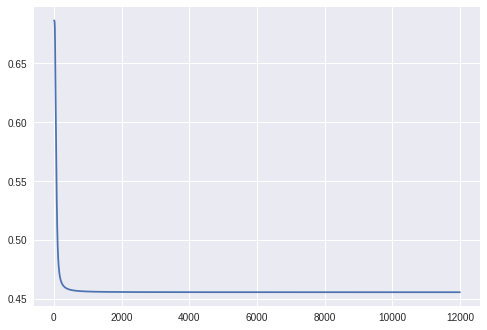

In [49]:
plt.plot(appended_point,err_log)  
plt.show()